In [454]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

results = pd.read_excel('./data/Results statistical moments.xlsx', header=None )
perday = results.iloc[[11, 12, 14, 15], 4:71]  # iloc uses zero-based indexing: Row 12 = index 11, Column E = index 4
# perday.columns = [
#     "base", "pv (1 kWp)","pv (5 kWp)", "pv (10 kWp)", "ev (2,5kw)", "ev (7 kw)", "ev (11 kw)", "ev(23kW)",
#       "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)", "base + ev (23 kW)",
#       "base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (1kwp) +ev (23kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (5kwp) + ev (23kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)", "base-pv (10kwp) +ev (23kw)"		
# ]

# Adjust the index to start at 0
perday.columns = range(len(perday.columns))
perday.index = ["Mean", "Standard Deviation", "Skewness", "Kurtosis"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
# scenarios = [
#     "base", "pv (1kwp)", "pv (5 kwp)", "pv (10 kwp)", "ev (2,5kw)", "ev (7 kw)",
#     "ev (11 kw)", "ev(23kW)", "base-pv (1 kWp)", "base - pv (5 kwp)", "base - pv (10 kwp)", 
# ]
#scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (1kwp) +ev (23kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (5kwp) + ev (23kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)", "base-pv (10kwp) +ev (23kw)"]		
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

#metrics = ["Mean", "Standard Deviation", "Skewness", "Kurtosis"]

dayC1 = pd.DataFrame(perday.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
dayC1.columns = scenarios_seperate
dayC2 = pd.DataFrame(perday.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
dayC2.columns = scenarios_seperate
dayC3 = pd.DataFrame(perday.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
dayC3.columns = scenarios_seperate

# dayC1_combined = pd.DataFrame(perday.iloc[:,[31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64]])
# dayC1_combined.columns = scenarios_combined
# dayC2_combined = pd.DataFrame(perday.iloc[:,[32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65]])
# dayC2_combined.columns = scenarios_combined
# dayC3_combined = pd.DataFrame(perday.iloc[:,[33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66]])
# dayC3_combined.columns = scenarios_combined

dayC1_combined = pd.DataFrame(perday.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
dayC1_combined.columns = scenarios_combined
dayC2_combined = pd.DataFrame(perday.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
dayC2_combined.columns = scenarios_combined
dayC3_combined = pd.DataFrame(perday.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
dayC3_combined.columns = scenarios_combined



In [455]:
import matplotlib.pyplot as plt

def plot_multiple_bars(df1, df2, df3, title1, title2, title3, ylabel):
    # Create a figure with 1 row and 3 columns (for 3 subplots)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot each DataFrame in a separate subplot
    df1.T.plot(kind="bar", ax=ax[0], legend=True)
    ax[0].set_title(title1)
    ax[0].set_ylabel(ylabel)
    ax[0].set_xlabel("Scenarios")
    ax[0].tick_params(axis='x', rotation=80)
    
    df2.T.plot(kind="bar", ax=ax[1], legend=True)
    ax[1].set_title(title2)
    ax[1].set_xlabel("Scenarios")
    ax[1].tick_params(axis='x', rotation=80)
    
    df3.T.plot(kind="bar", ax=ax[2], legend=True)
    ax[2].set_title(title3)
    ax[2].set_xlabel("Scenarios")
    ax[2].tick_params(axis='x', rotation=80)
    
    # Calculate the common y-axis limit from all three DataFrames
    all_data = pd.concat([df1, df2, df3])
    min_y = all_data.min().min()  # Minimum value across all
    max_y = all_data.max().max()  # Maximum value across all
    
    # Set the same y-axis limit for all subplots
    for axis in ax:
        axis.set_ylim(min_y - 0.1 * (max_y - min_y), max_y + 0.1 * (max_y - min_y))  # Adding some margin


    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

Mean, standard dev, skew, kurt

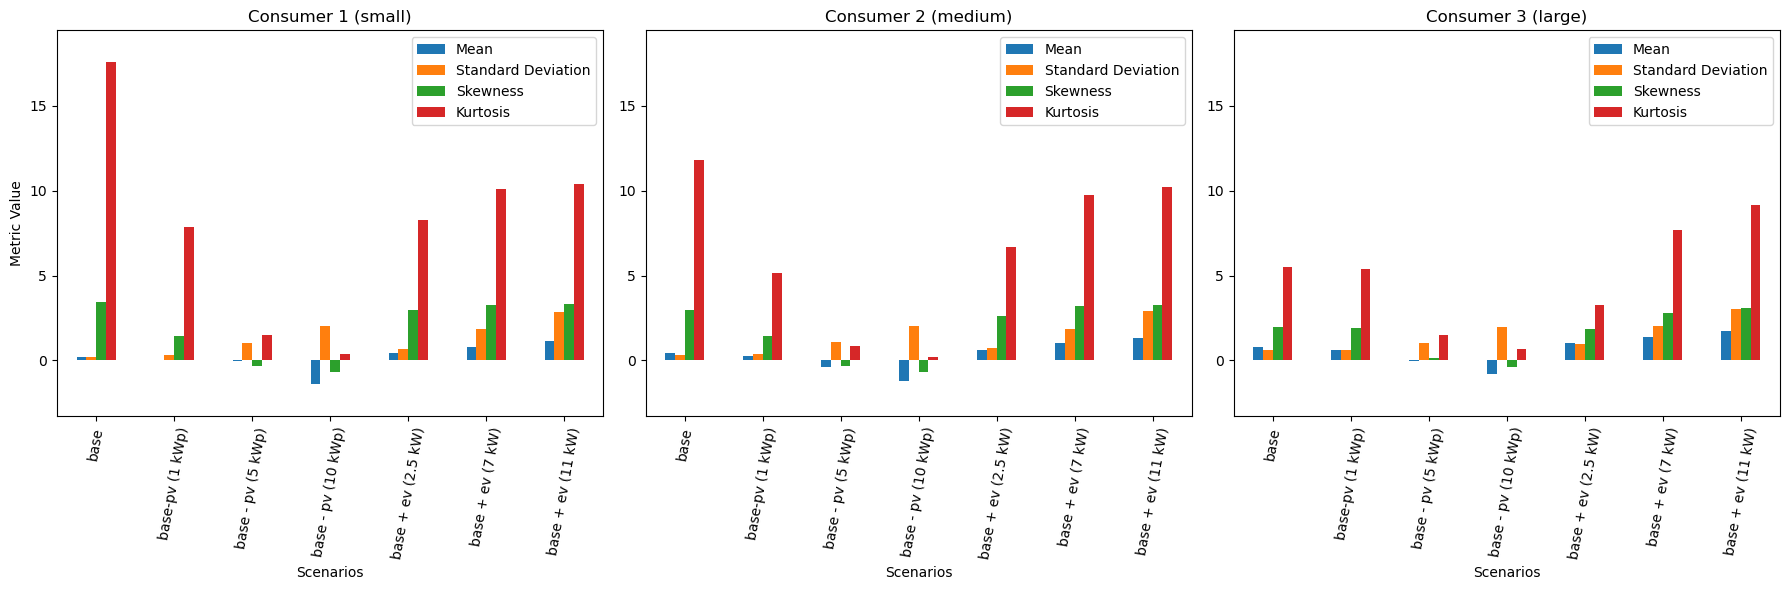

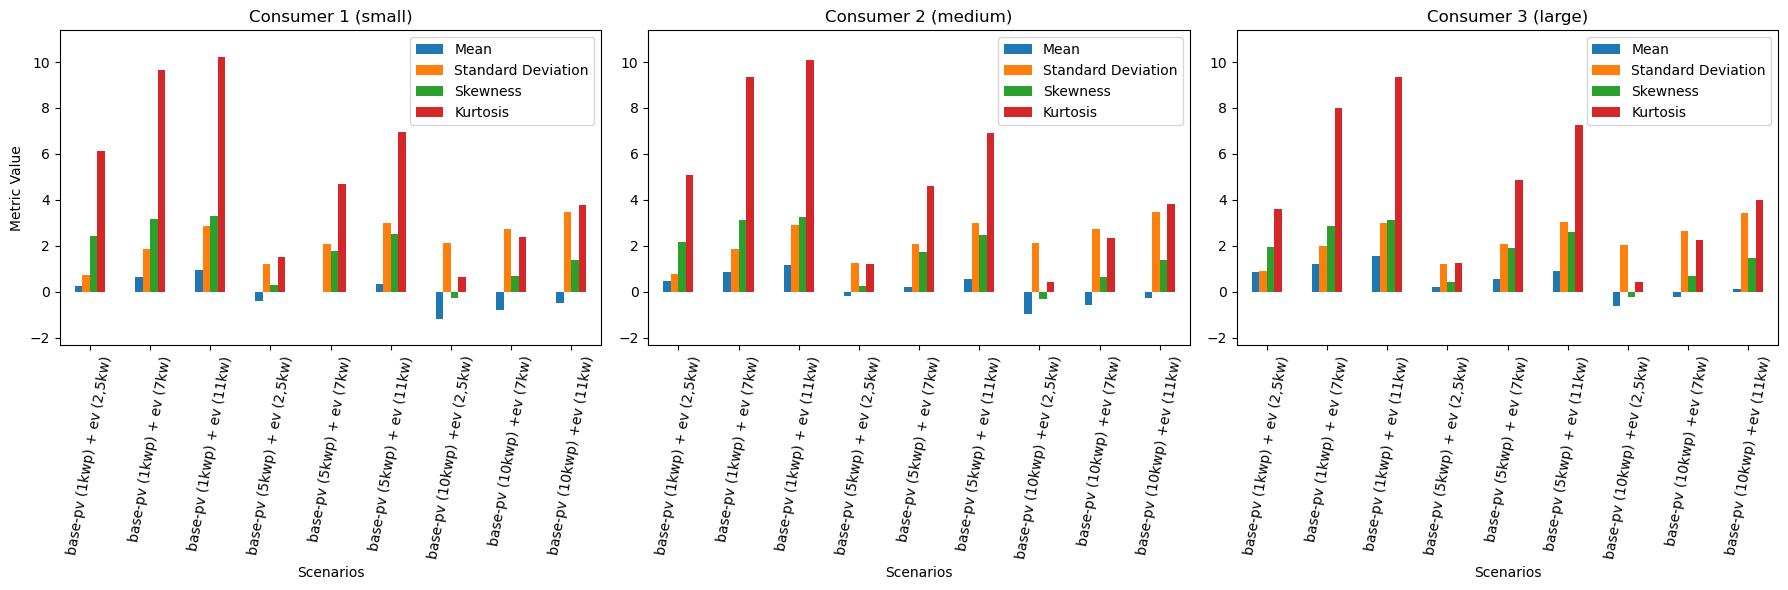

In [456]:
# Call the function to plot three bar plots side by side
plot_multiple_bars(dayC1, dayC2, dayC3, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined, dayC2_combined, dayC3_combined, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")

Mean, std, skew, kurt normalized to base

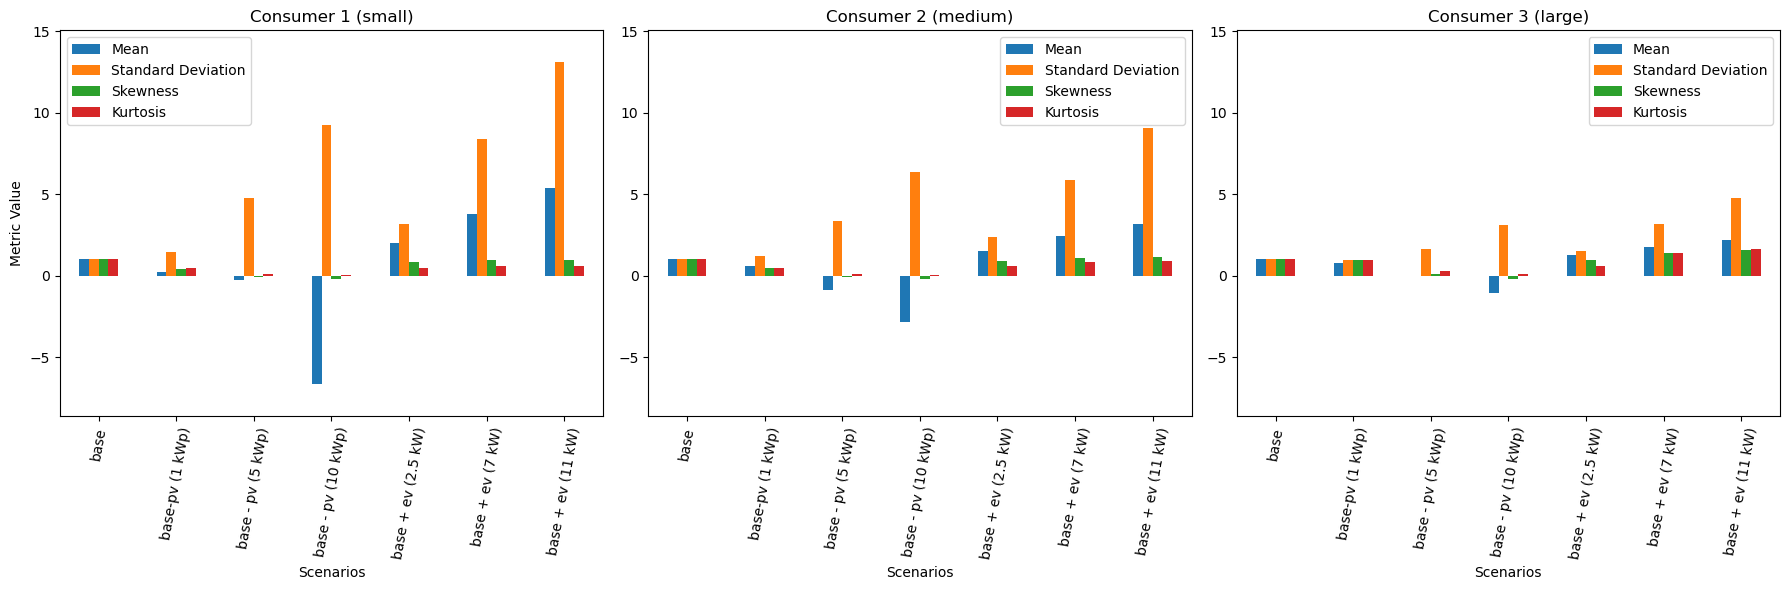

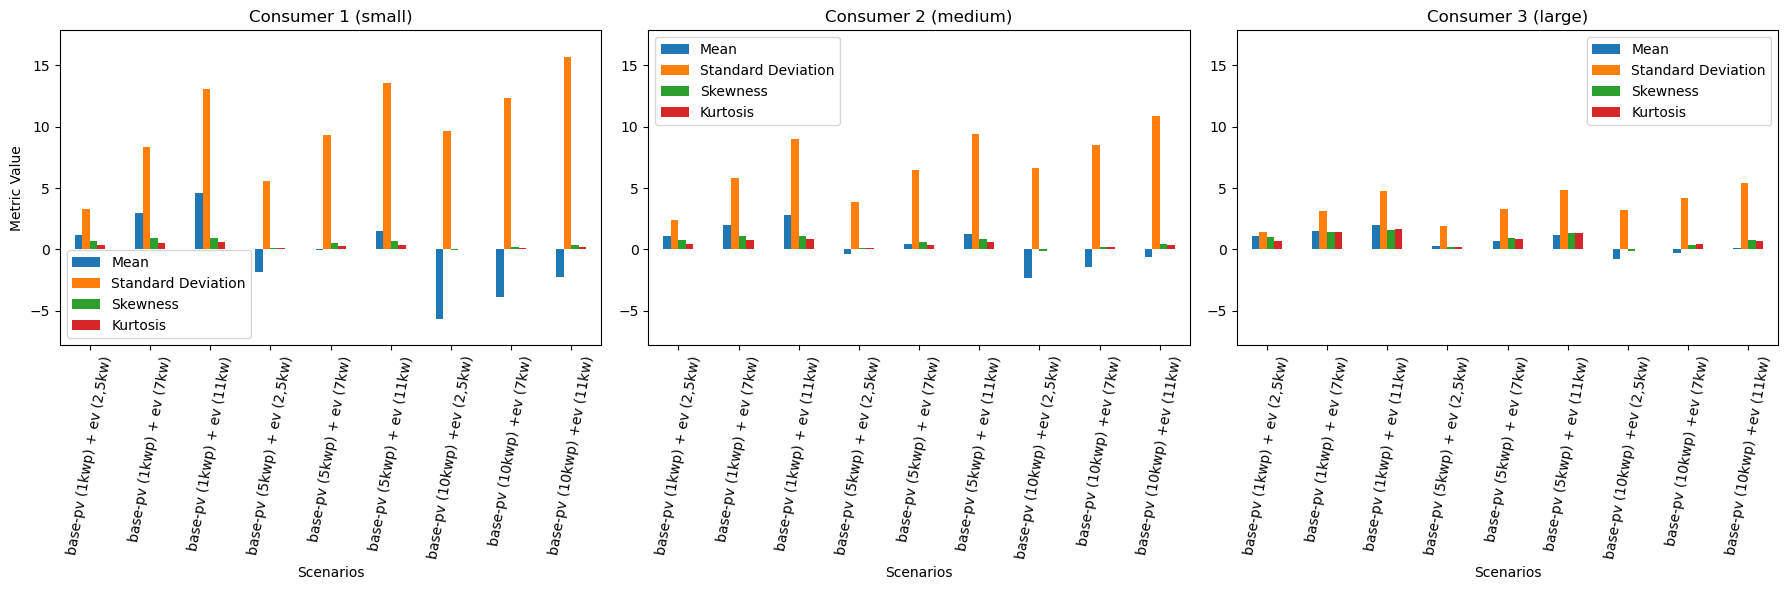

In [457]:
dayC1_norm = dayC1.div(dayC1["base"], axis=0)
dayC2_norm = dayC2.div(dayC2["base"], axis=0)
dayC3_norm = dayC3.div(dayC3["base"], axis=0)
dayC1_combined_norm = dayC1_combined.div(dayC1["base"], axis=0)
dayC2_combined_norm = dayC2_combined.div(dayC2["base"], axis=0)
dayC3_combined_norm = dayC3_combined.div(dayC3["base"], axis=0)



plot_multiple_bars(dayC1_norm, dayC2_norm, dayC3_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined_norm, dayC2_combined_norm, dayC3_combined_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")


Skew, kurt

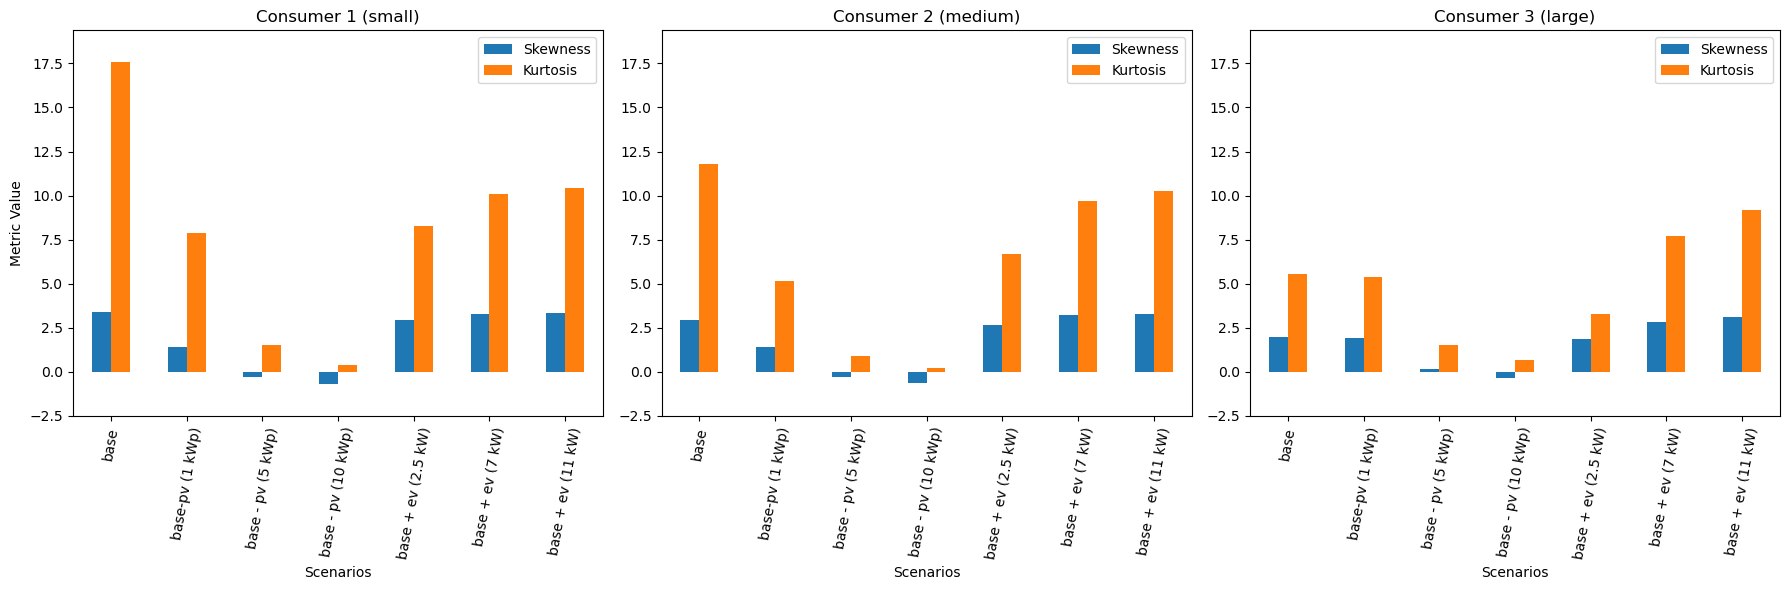

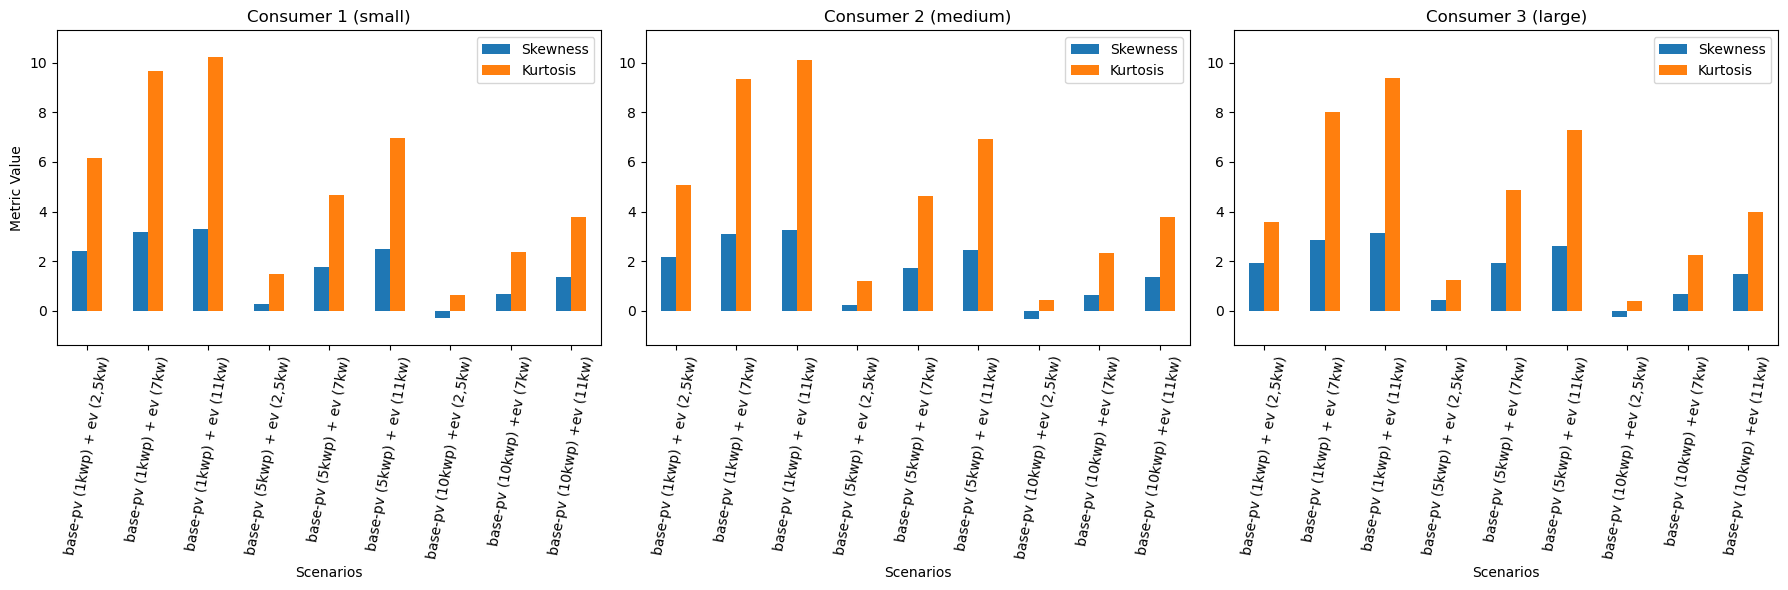

In [458]:
# Without std
dayC1 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[0, 10, 13, 16, 19, 22, 25]])
dayC1.columns = scenarios_seperate
dayC2 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[1, 11, 14, 17, 20, 23, 26]])
dayC2.columns = scenarios_seperate
dayC3 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[2, 12, 15, 18, 21, 24, 27]])
dayC3.columns = scenarios_seperate

# dayC1_combined = pd.DataFrame(perday.iloc[:,[31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64]])
# dayC1_combined.columns = scenarios_combined
# dayC2_combined = pd.DataFrame(perday.iloc[:,[32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65]])
# dayC2_combined.columns = scenarios_combined
# dayC3_combined = pd.DataFrame(perday.iloc[:,[33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66]])
# dayC3_combined.columns = scenarios_combined

dayC1_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[31, 34, 37, 43, 46, 49, 55, 58, 61]])
dayC1_combined.columns = scenarios_combined
dayC2_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[32, 35, 38, 44, 47, 50, 56, 59, 62]])
dayC2_combined.columns = scenarios_combined
dayC3_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[33, 36, 39, 45, 48, 51, 57, 60, 63]])
dayC3_combined.columns = scenarios_combined


plot_multiple_bars(dayC1, dayC2, dayC3, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined, dayC2_combined, dayC3_combined, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")

Skew, kurt normalized to base

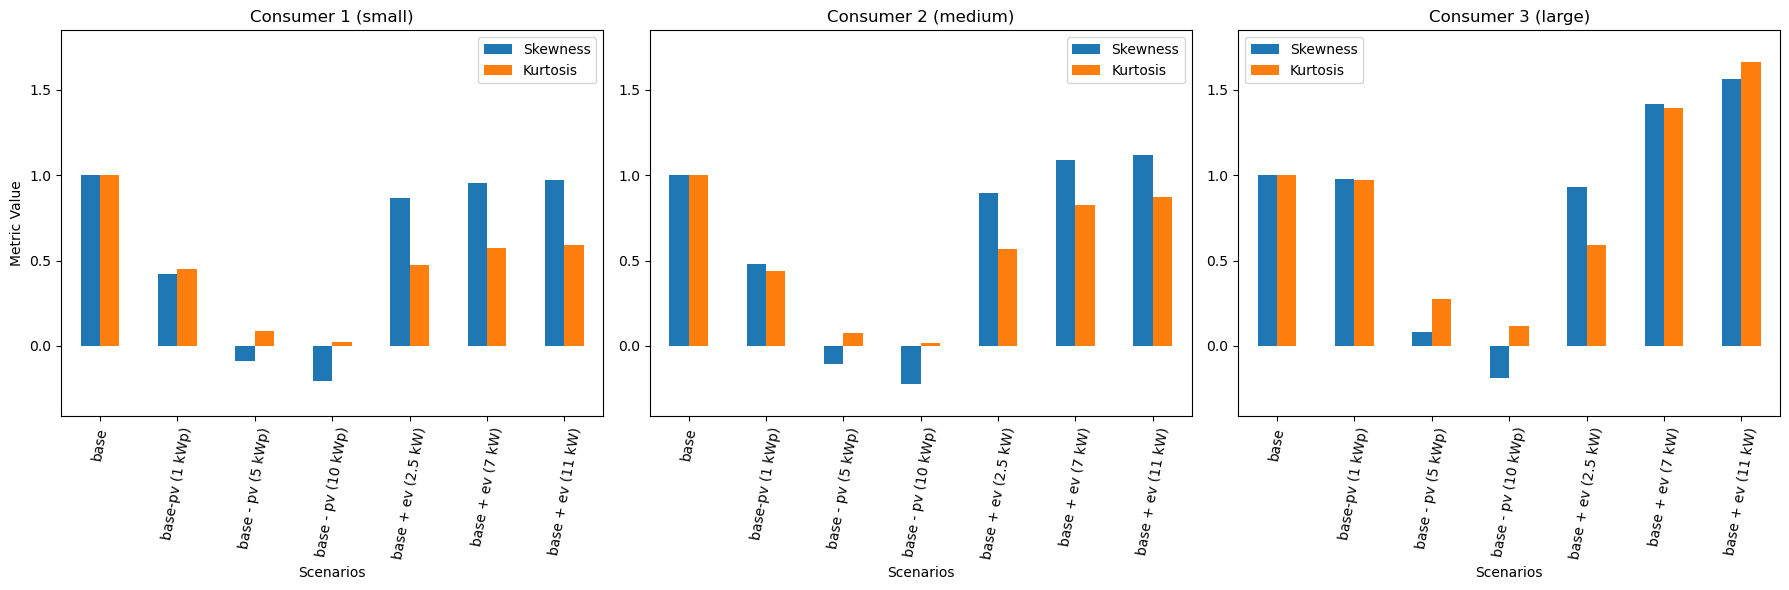

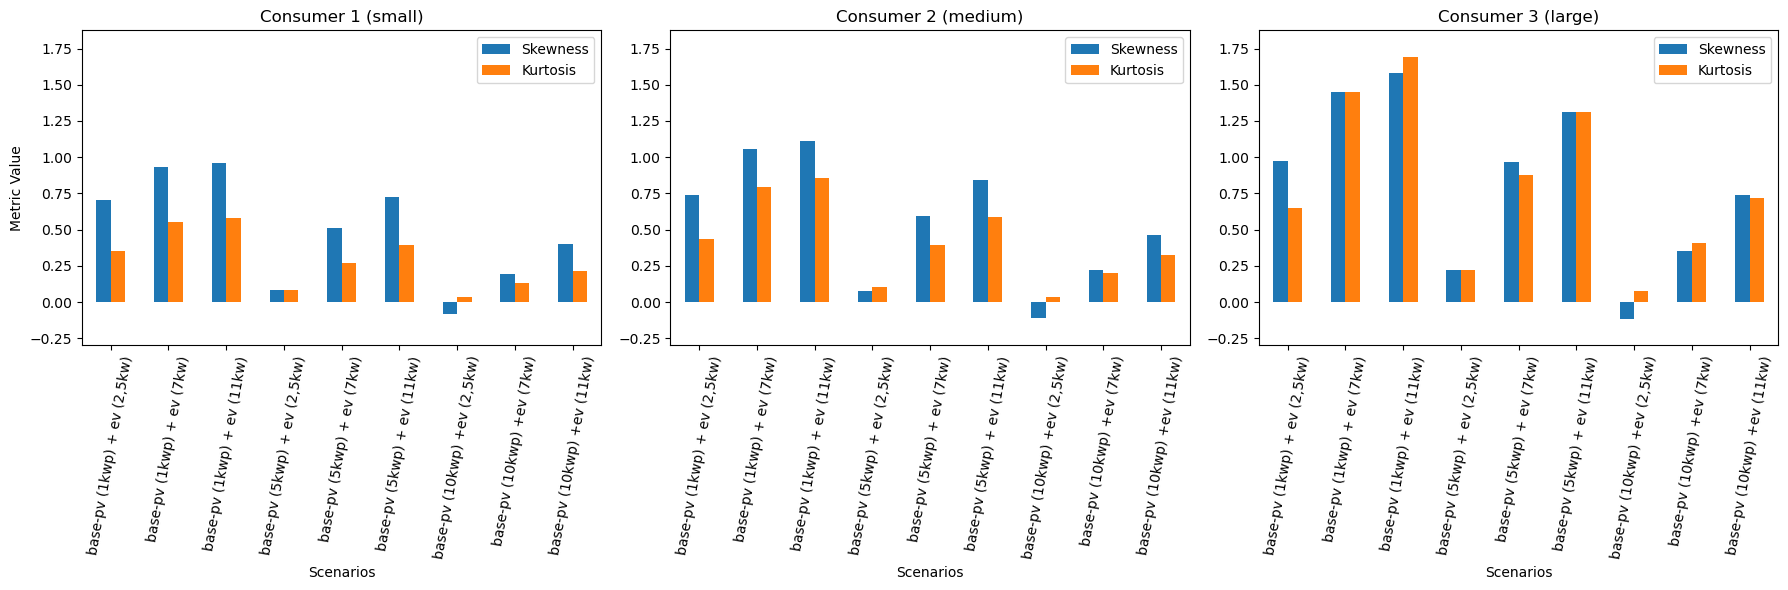

In [459]:
# Without std
dayC1 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[0, 10, 13, 16, 19, 22, 25]])
dayC1.columns = scenarios_seperate
dayC2 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[1, 11, 14, 17, 20, 23, 26]])
dayC2.columns = scenarios_seperate
dayC3 = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[2, 12, 15, 18, 21, 24, 27]])
dayC3.columns = scenarios_seperate

# dayC1_combined = pd.DataFrame(perday.iloc[:,[31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64]])
# dayC1_combined.columns = scenarios_combined
# dayC2_combined = pd.DataFrame(perday.iloc[:,[32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65]])
# dayC2_combined.columns = scenarios_combined
# dayC3_combined = pd.DataFrame(perday.iloc[:,[33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66]])
# dayC3_combined.columns = scenarios_combined

dayC1_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[31, 34, 37, 43, 46, 49, 55, 58, 61]])
dayC1_combined.columns = scenarios_combined
dayC2_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[32, 35, 38, 44, 47, 50, 56, 59, 62]])
dayC2_combined.columns = scenarios_combined
dayC3_combined = pd.DataFrame(perday.loc[["Skewness","Kurtosis"],[33, 36, 39, 45, 48, 51, 57, 60, 63]])
dayC3_combined.columns = scenarios_combined

dayC1_norm = dayC1.div(dayC1["base"], axis=0)
dayC2_norm = dayC2.div(dayC2["base"], axis=0)
dayC3_norm = dayC3.div(dayC3["base"], axis=0)
dayC1_combined_norm = dayC1_combined.div(dayC1["base"], axis=0)
dayC2_combined_norm = dayC2_combined.div(dayC2["base"], axis=0)
dayC3_combined_norm = dayC3_combined.div(dayC3["base"], axis=0)



plot_multiple_bars(dayC1_norm, dayC2_norm, dayC3_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined_norm, dayC2_combined_norm, dayC3_combined_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")


Min, max, load

In [460]:
def plot_multiple_bars_different_y(df1, df2, df3, title1, title2, title3):
    # Create a figure with 1 row and 3 columns (for 3 subplots)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot each DataFrame in a separate subplot
    df1.plot(kind="bar", ax=ax[0], legend=True)
    ax[0].set_title(title1)
    ax[0].set_ylabel("kW")
    ax[0].set_xlabel("Scenarios")
    ax[0].tick_params(axis='x', rotation=80)
    
    df2.plot(kind="bar", ax=ax[1], legend=True)
    ax[1].set_title(title2)
    ax[1].set_ylabel("kW")
    ax[1].set_xlabel("Scenarios")
    ax[1].tick_params(axis='x', rotation=80)
    
    df3.plot(kind="bar", ax=ax[2], legend=True)
    ax[2].set_title(title3)
    ax[2].set_ylabel("kWh")
    ax[2].set_xlabel("Scenarios")
    ax[2].tick_params(axis='x', rotation=80)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

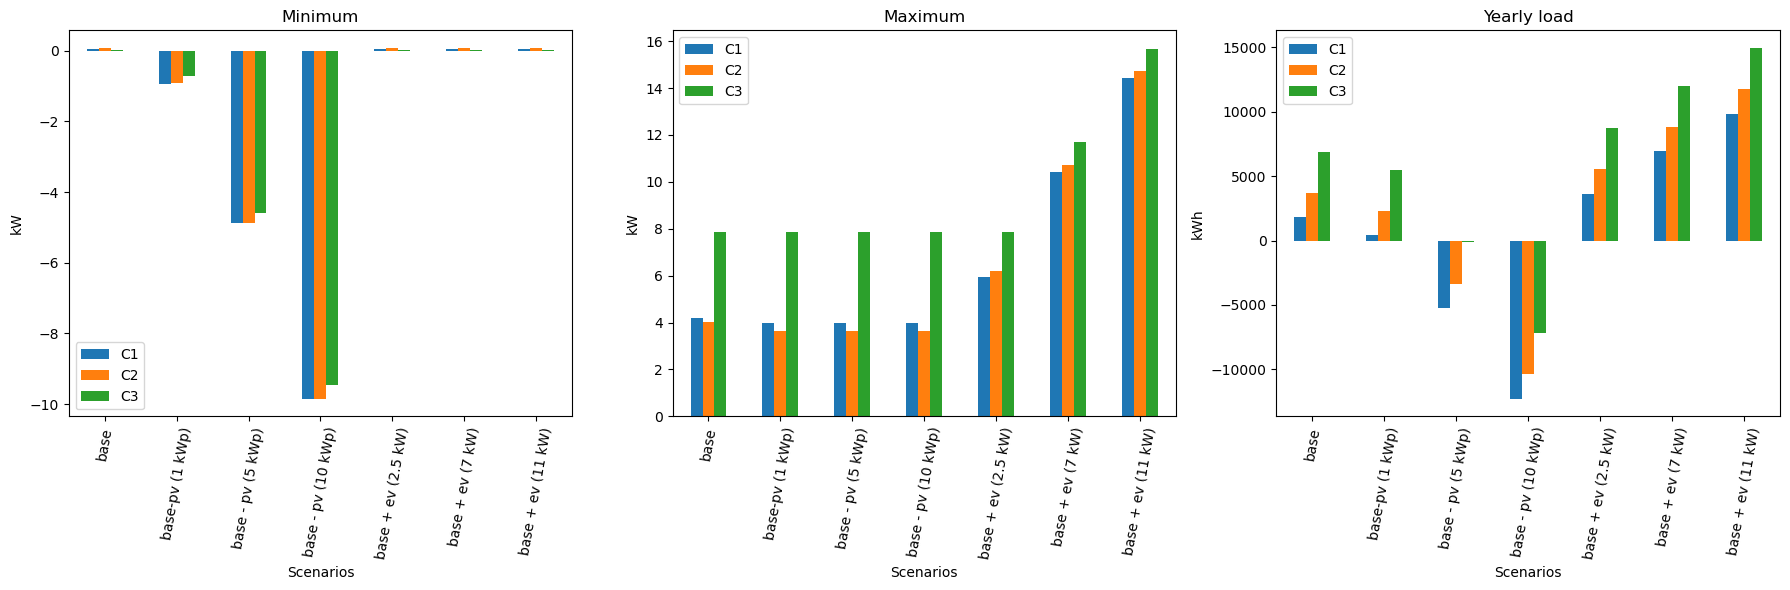

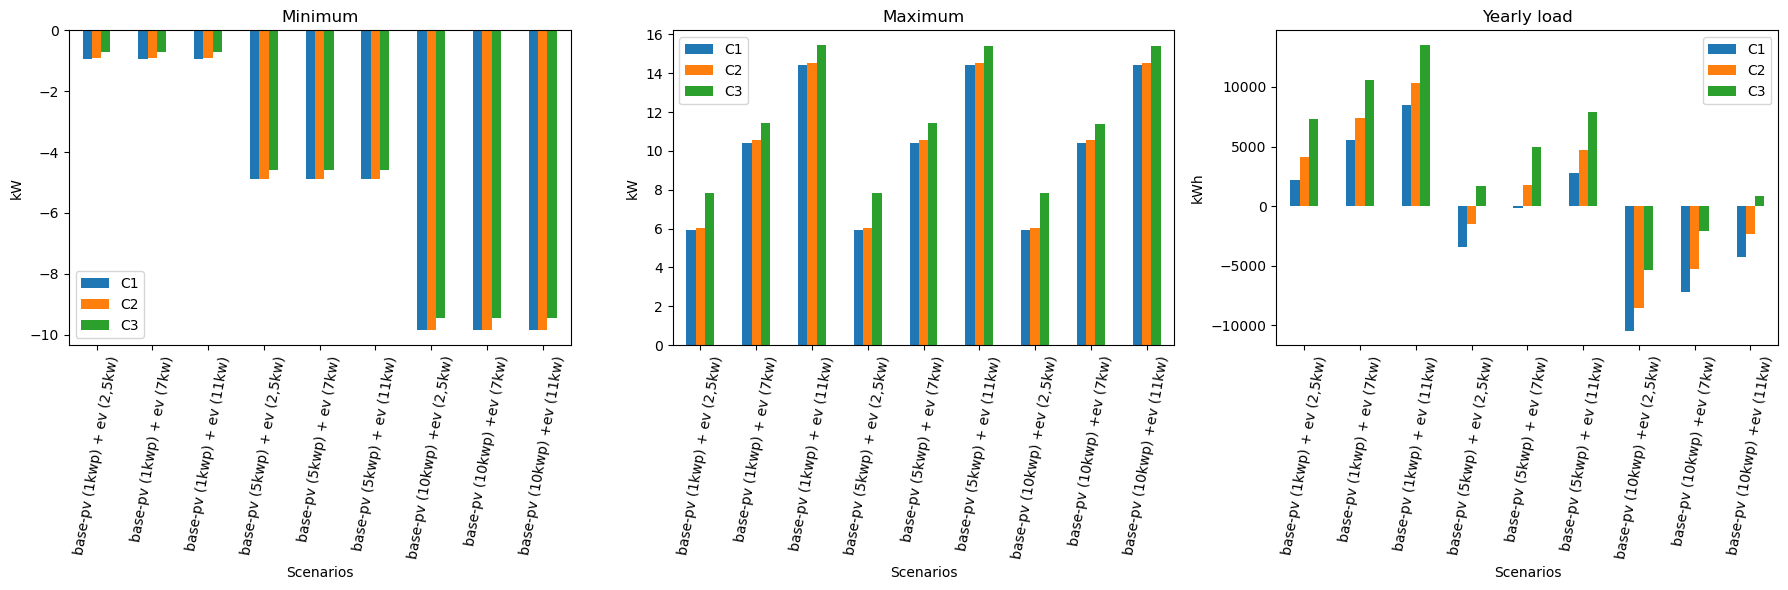

In [461]:
# Min per consumer per scenario
wholeprofile = results.iloc[[3, 4, 6], 4:71]  # iloc uses zero-based indexing: Row 12 = index 11, Column E = index 4
wholeprofile.columns = range(len(wholeprofile.columns))
wholeprofile.index = ["Min", "Max", "Load"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		


c1 = pd.DataFrame(wholeprofile.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
c1.columns = scenarios_seperate
c2 = pd.DataFrame(wholeprofile.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
c2.columns = scenarios_seperate
c3 = pd.DataFrame(wholeprofile.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
c3.columns = scenarios_seperate

min = pd.DataFrame({'C1': c1.iloc[0],'C2': c2.iloc[0],'C3': c3.iloc[0]})
max = pd.DataFrame({'C1': c1.iloc[1],'C2': c2.iloc[1],'C3': c3.iloc[1]})
load = pd.DataFrame({'C1': c1.iloc[2],'C2': c2.iloc[2],'C3': c3.iloc[2]})

plot_multiple_bars_different_y(min, max, load, "Minimum", "Maximum", "Yearly load")

C1_combined = pd.DataFrame(wholeprofile.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
C1_combined.columns = scenarios_combined
C2_combined = pd.DataFrame(wholeprofile.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
C2_combined.columns = scenarios_combined
C3_combined = pd.DataFrame(wholeprofile.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
C3_combined.columns = scenarios_combined
min_combined = pd.DataFrame({'C1': C1_combined.iloc[0],'C2': C2_combined.iloc[0],'C3': C3_combined.iloc[0]})
max_combined = pd.DataFrame({'C1': C1_combined.iloc[1],'C2': C2_combined.iloc[1],'C3': C3_combined.iloc[1]})
load_combined = pd.DataFrame({'C1': C1_combined.iloc[2],'C2': C2_combined.iloc[2],'C3': C3_combined.iloc[2]})

plot_multiple_bars_different_y(min_combined, max_combined, load_combined, "Minimum", "Maximum", "Yearly load")


First difference

In [462]:
perday_diff = results.iloc[[18, 19, 21, 22], 4:71] # iloc uses zero-based indexing: Row 12 = index 11, Column E = index 4

# Adjust the index to start at 0
perday_diff.columns = range(len(perday_diff.columns))
perday_diff.index = ["Mean", "Standard Deviation", "Skewness", "Kurtosis"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

dayC1_diff = pd.DataFrame(perday_diff.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
dayC1_diff.columns = scenarios_seperate
dayC2_diff = pd.DataFrame(perday_diff.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
dayC2_diff.columns = scenarios_seperate
dayC3_diff = pd.DataFrame(perday_diff.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
dayC3_diff.columns = scenarios_seperate

dayC1_combined_diff = pd.DataFrame(perday_diff.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
dayC1_combined_diff.columns = scenarios_combined
dayC2_combined_diff = pd.DataFrame(perday_diff.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
dayC2_combined_diff.columns = scenarios_combined
dayC3_combined_diff = pd.DataFrame(perday_diff.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
dayC3_combined_diff.columns = scenarios_combined

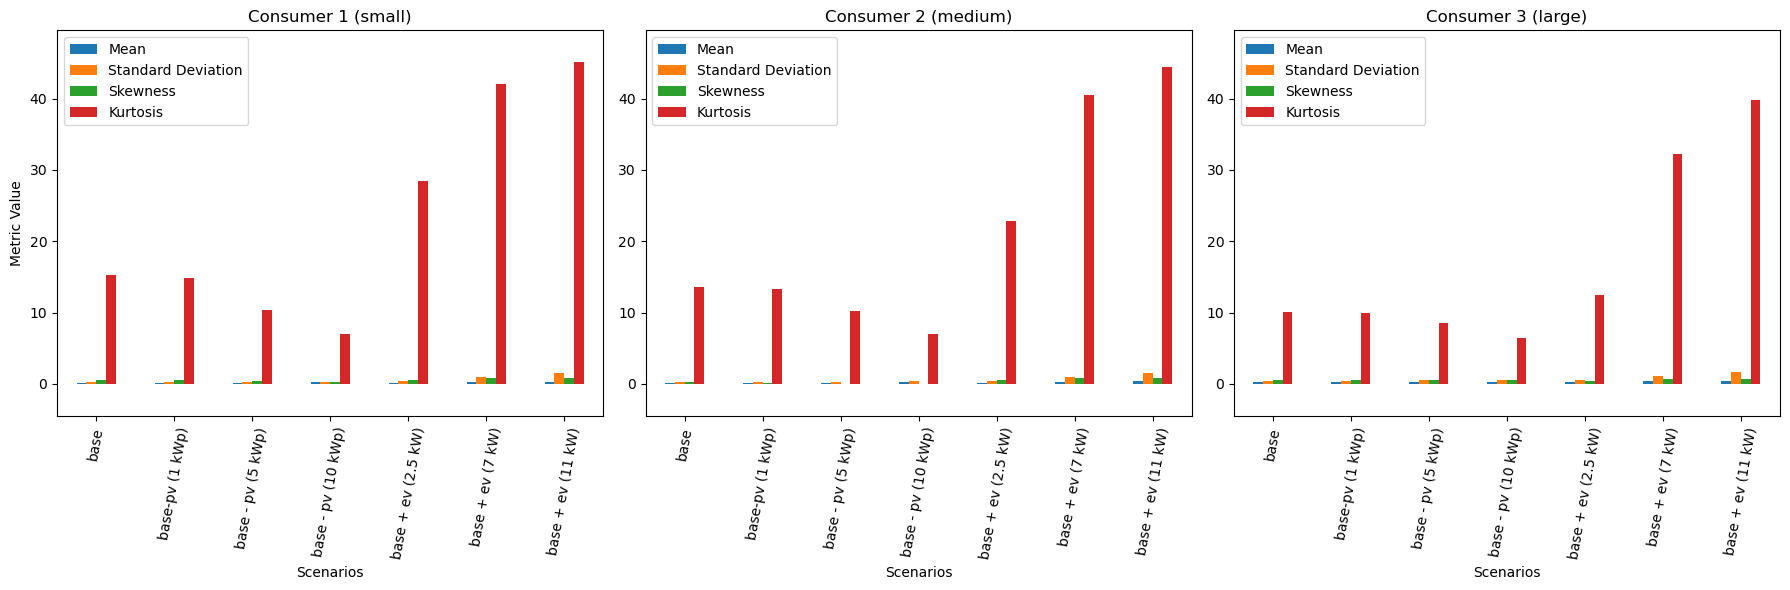

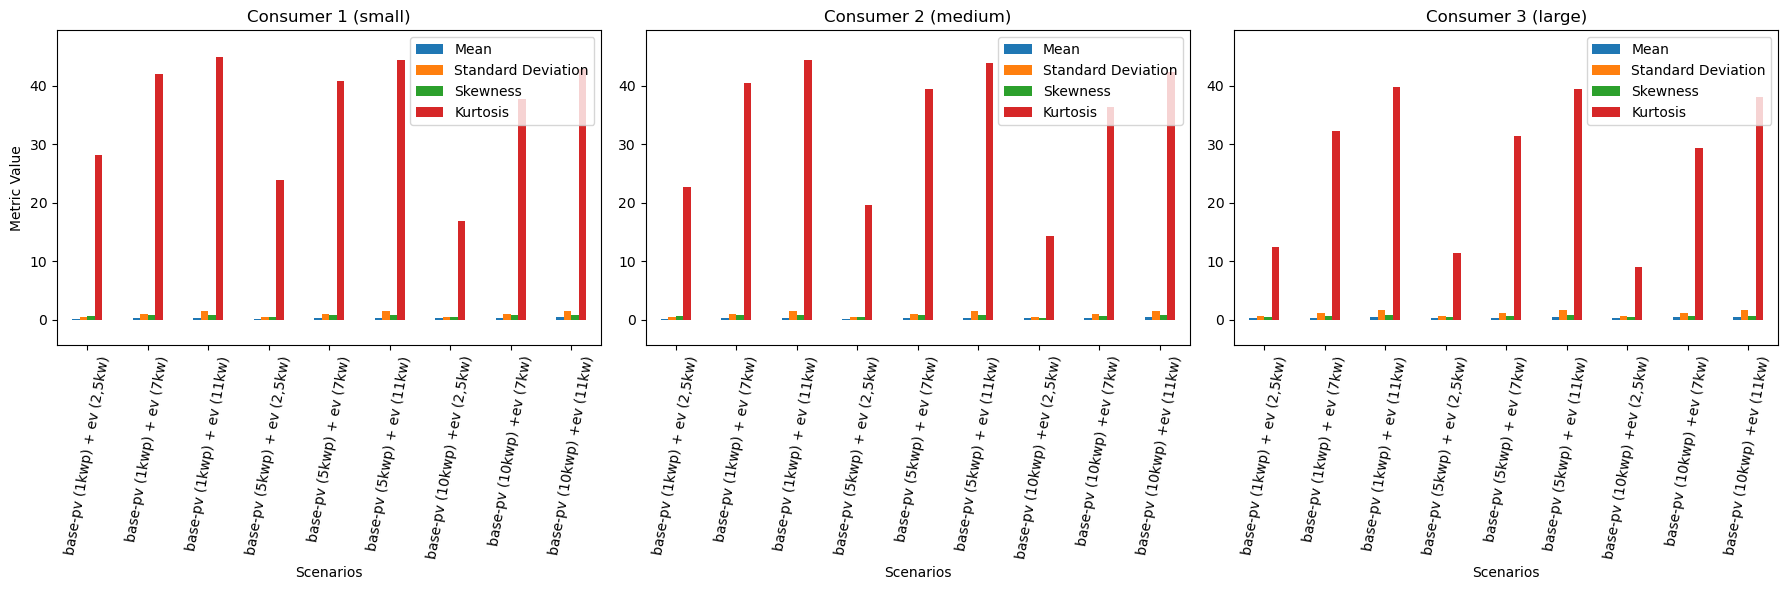

In [463]:
# Mean, std, skew, kurt
plot_multiple_bars(dayC1_diff, dayC2_diff, dayC3_diff, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined_diff, dayC2_combined_diff, dayC3_combined_diff, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")

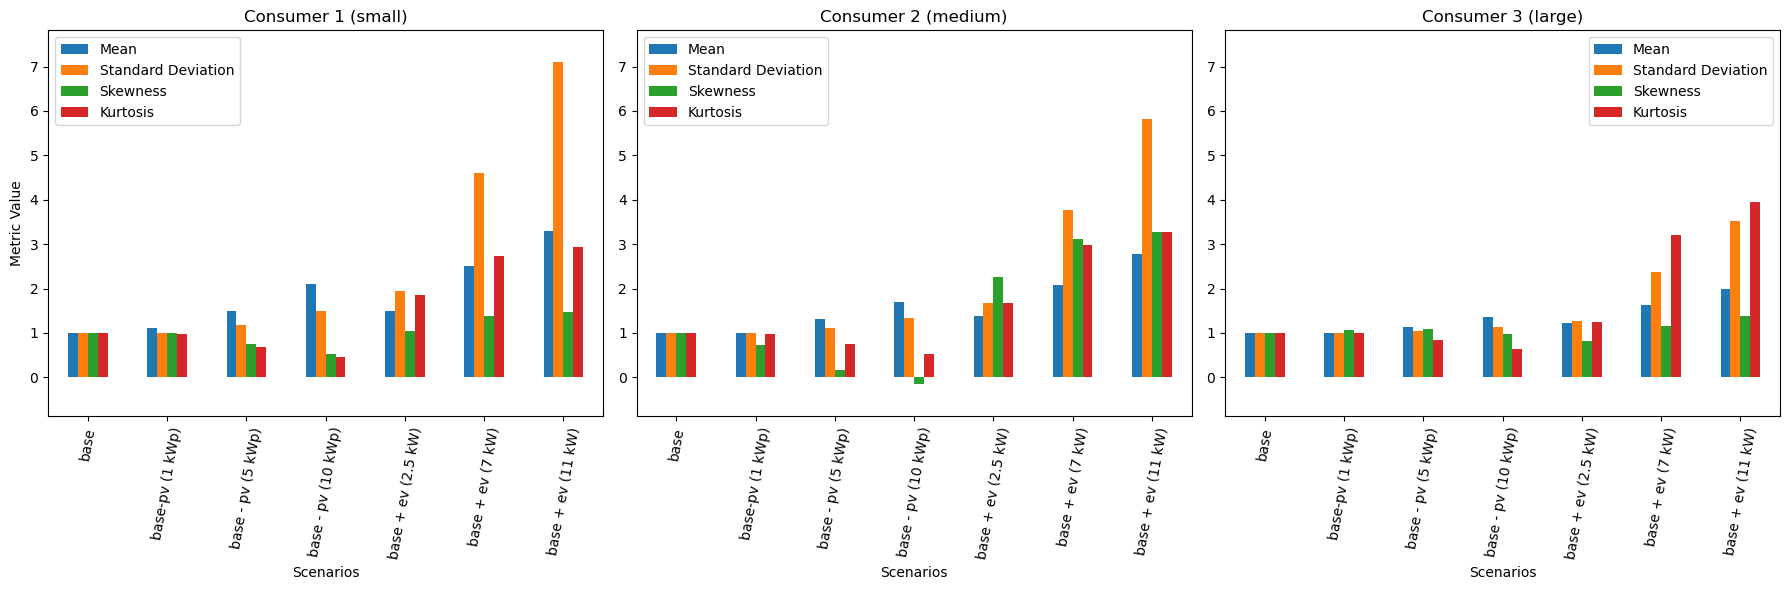

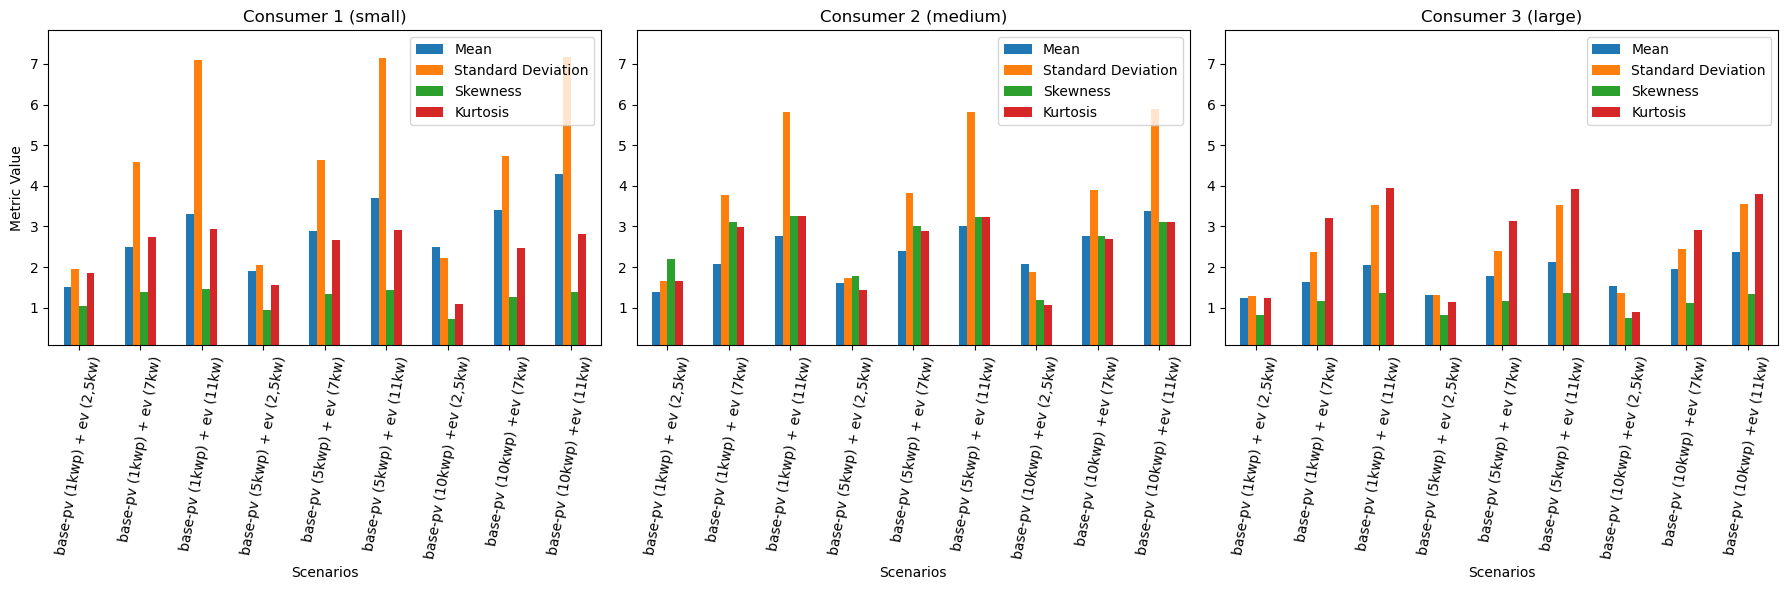

In [464]:
# Normalized to base
dayC1_diff_norm = dayC1_diff.div(dayC1_diff["base"], axis=0)
dayC2_diff_norm = dayC2_diff.div(dayC2_diff["base"], axis=0)
dayC3_diff_norm = dayC3_diff.div(dayC3_diff["base"], axis=0)
dayC1_combined_diff_norm = dayC1_combined_diff.div(dayC1_diff["base"], axis=0)
dayC2_combined_diff_norm = dayC2_combined_diff.div(dayC2_diff["base"], axis=0)
dayC3_combined_diff_norm = dayC3_combined_diff.div(dayC3_diff["base"], axis=0)

plot_multiple_bars(dayC1_diff_norm, dayC2_diff_norm, dayC3_diff_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(dayC1_combined_diff_norm, dayC2_combined_diff_norm, dayC3_combined_diff_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")


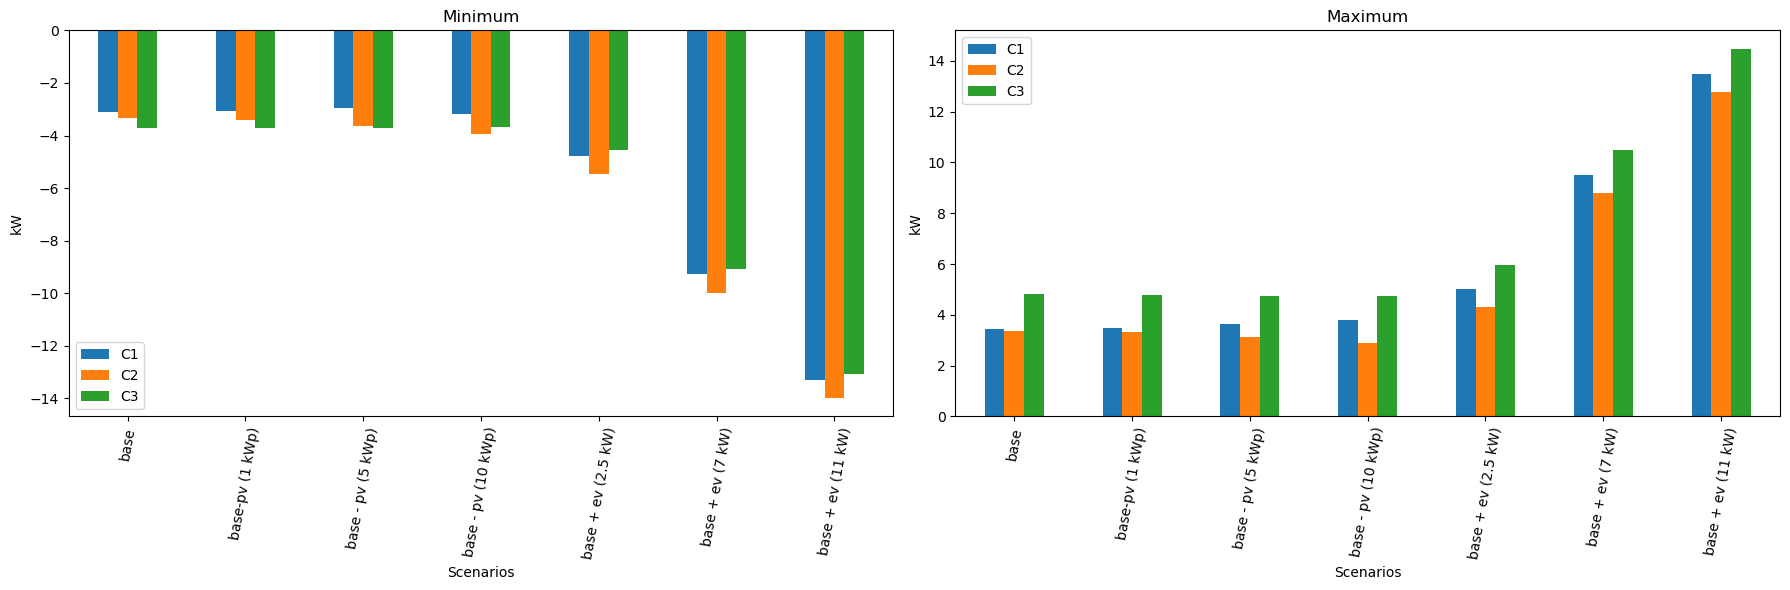

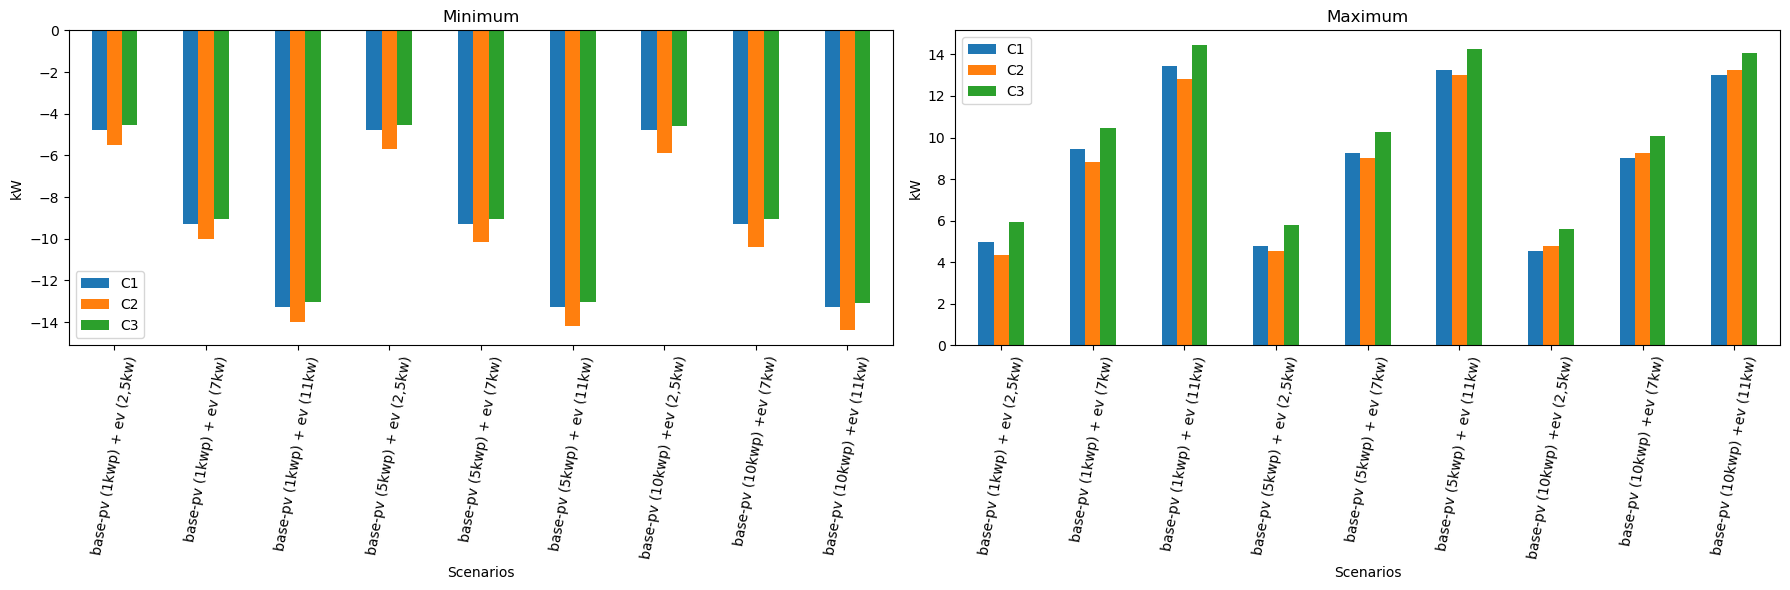

In [465]:
# Min, max
# Min per consumer per scenario
def plot_2_bars(df1, df2, title1, title2):
    # Create a figure with 1 row and 3 columns (for 3 subplots)
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot each DataFrame in a separate subplot
    df1.plot(kind="bar", ax=ax[0], legend=True)
    ax[0].set_title(title1)
    ax[0].set_ylabel("kW")
    ax[0].set_xlabel("Scenarios")
    ax[0].tick_params(axis='x', rotation=80)
    
    df2.plot(kind="bar", ax=ax[1], legend=True)
    ax[1].set_title(title2)
    ax[1].set_ylabel("kW")
    ax[1].set_xlabel("Scenarios")
    ax[1].tick_params(axis='x', rotation=80)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

minmax = results.iloc[[16, 17], 4:71]  
minmax.columns = range(len(minmax.columns))
minmax.index = ["Min", "Max"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

c1 = pd.DataFrame(minmax.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
c1.columns = scenarios_seperate
c2 = pd.DataFrame(minmax.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
c2.columns = scenarios_seperate
c3 = pd.DataFrame(minmax.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
c3.columns = scenarios_seperate

min = pd.DataFrame({'C1': c1.iloc[0],'C2': c2.iloc[0],'C3': c3.iloc[0]})
max = pd.DataFrame({'C1': c1.iloc[1],'C2': c2.iloc[1],'C3': c3.iloc[1]})

plot_2_bars(min, max,"Minimum", "Maximum")

C1_combined = pd.DataFrame(minmax.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
C1_combined.columns = scenarios_combined
C2_combined = pd.DataFrame(minmax.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
C2_combined.columns = scenarios_combined
C3_combined = pd.DataFrame(minmax.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
C3_combined.columns = scenarios_combined
min_combined = pd.DataFrame({'C1': C1_combined.iloc[0],'C2': C2_combined.iloc[0],'C3': C3_combined.iloc[0]})
max_combined = pd.DataFrame({'C1': C1_combined.iloc[1],'C2': C2_combined.iloc[1],'C3': C3_combined.iloc[1]})
#load_combined = pd.DataFrame({'C1': C1_combined.iloc[2],'C2': C2_combined.iloc[2],'C3': C3_combined.iloc[2]})

plot_2_bars(min_combined, max_combined, "Minimum", "Maximum")


1x96

In [466]:
results = pd.read_excel('./data/Results statistical moments.xlsx', header=None )
perqh = results.iloc[[29, 30, 32, 33], 4:71]  
perqh.columns = range(len(perqh.columns))
perqh.index = ["Mean", "Standard Deviation", "Skewness", "Kurtosis"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

qhC1 = pd.DataFrame(perqh.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
qhC1.columns = scenarios_seperate
qhC2 = pd.DataFrame(perqh.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
qhC2.columns = scenarios_seperate
qhC3 = pd.DataFrame(perqh.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
qhC3.columns = scenarios_seperate

qhC1_combined = pd.DataFrame(perqh.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
qhC1_combined.columns = scenarios_combined
qhC2_combined = pd.DataFrame(perqh.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
qhC2_combined.columns = scenarios_combined
qhC3_combined = pd.DataFrame(perqh.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
qhC3_combined.columns = scenarios_combined

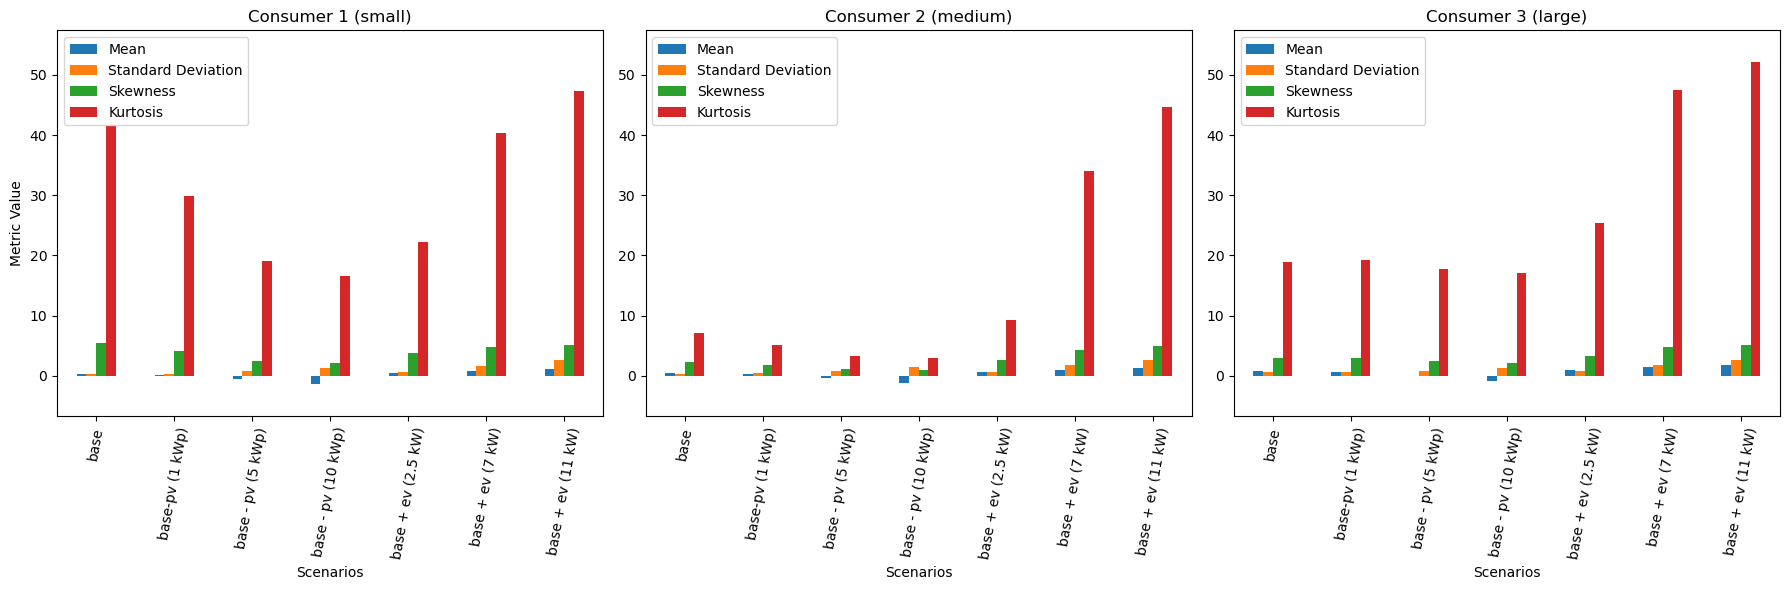

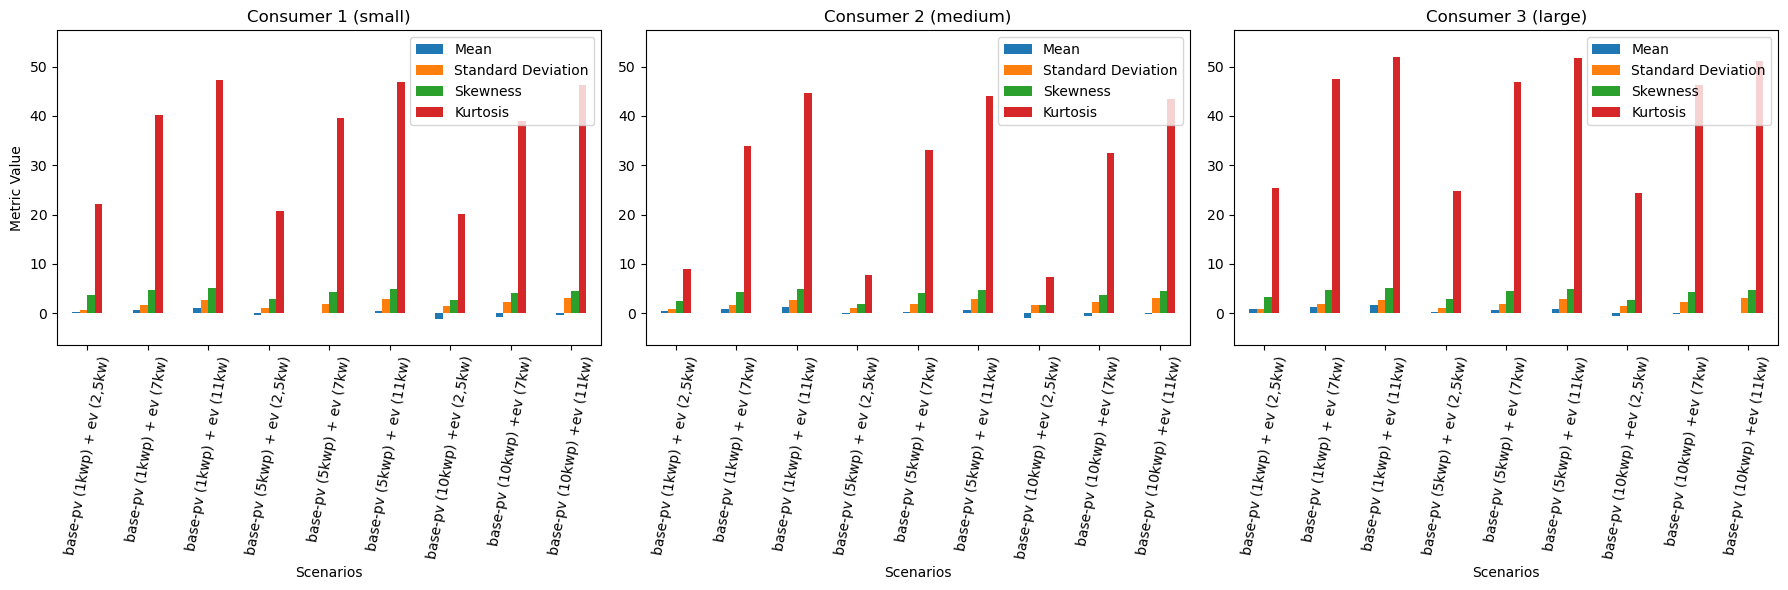

In [467]:
plot_multiple_bars(qhC1, qhC2, qhC3, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(qhC1_combined, qhC2_combined, qhC3_combined, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")

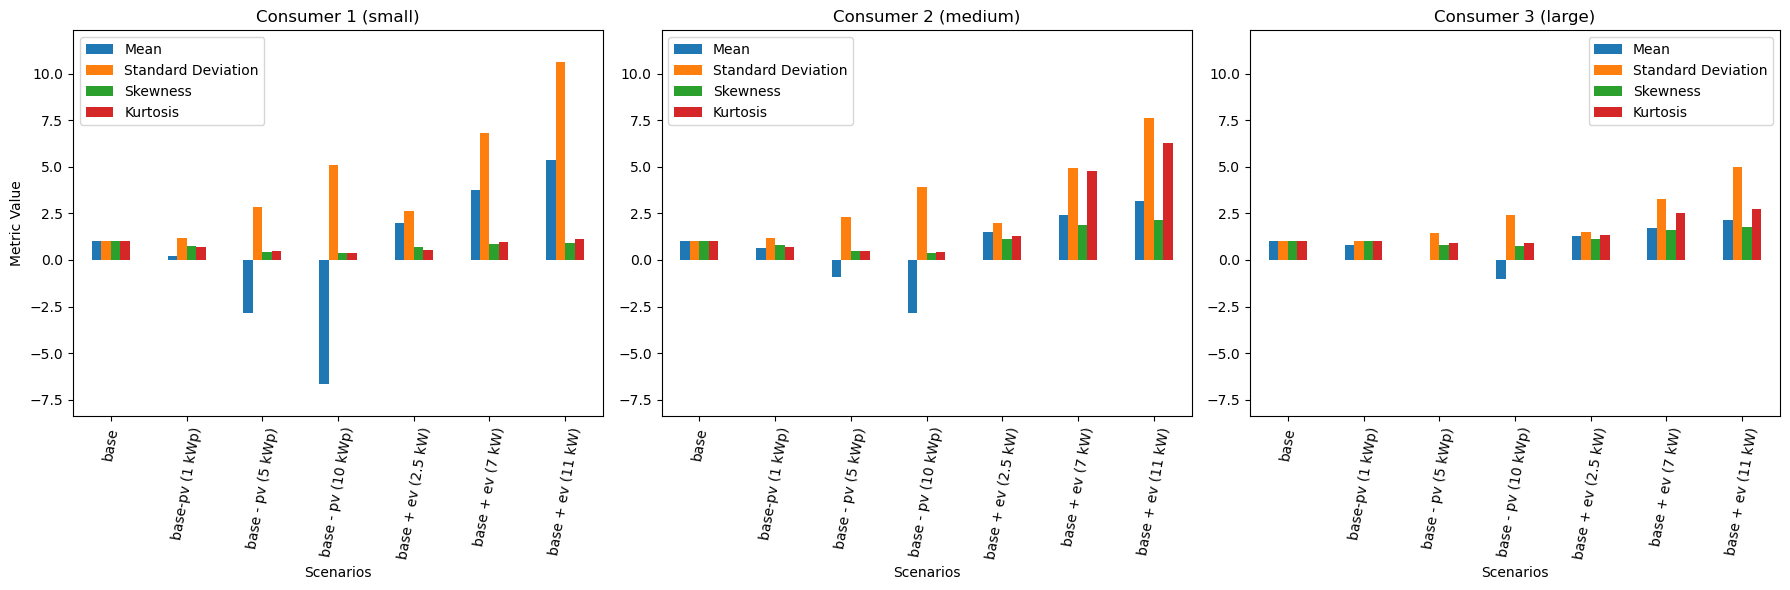

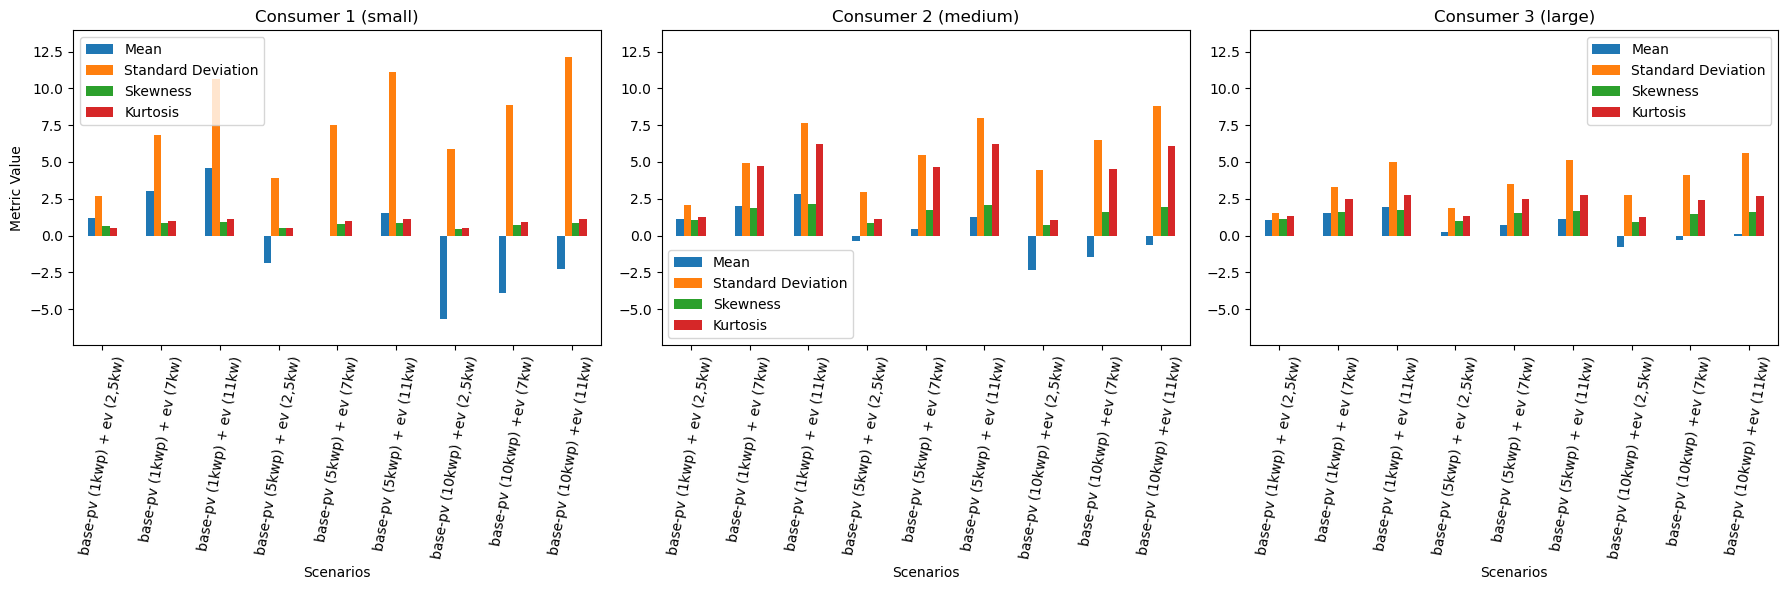

In [468]:
#Normalized to baseload

qhC1_norm = qhC1.div(qhC1["base"], axis=0)
qhC2_norm = qhC2.div(qhC2["base"], axis=0)
qhC3_norm = qhC3.div(qhC3["base"], axis=0)
qhC1_combined_norm = qhC1_combined.div(qhC1["base"], axis=0)
qhC2_combined_norm = qhC2_combined.div(qhC2["base"], axis=0)
qhC3_combined_norm = qhC3_combined.div(qhC3["base"], axis=0)



plot_multiple_bars(qhC1_norm, qhC2_norm, qhC3_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(qhC1_combined_norm, qhC2_combined_norm, qhC3_combined_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")


First difference

In [469]:
perqh_diff = results.iloc[[36, 37, 39, 40], 4:71] 
perqh_diff.columns = range(len(perqh_diff.columns))
perqh_diff.index = ["Mean", "Standard Deviation", "Skewness", "Kurtosis"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

qhC1_diff = pd.DataFrame(perqh_diff.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
qhC1_diff.columns = scenarios_seperate
qhC2_diff = pd.DataFrame(perqh_diff.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
qhC2_diff.columns = scenarios_seperate
qhC3_diff = pd.DataFrame(perqh_diff.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
qhC3_diff.columns = scenarios_seperate

qhC1_combined_diff = pd.DataFrame(perqh_diff.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
qhC1_combined_diff.columns = scenarios_combined
qhC2_combined_diff = pd.DataFrame(perqh_diff.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
qhC2_combined_diff.columns = scenarios_combined
qhC3_combined_diff = pd.DataFrame(perqh_diff.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
qhC3_combined_diff.columns = scenarios_combined

In [470]:
print(qhC1_diff)

                     base base-pv (1 kWp) base - pv (5 kWp)  \
Mean                    0            0.19              0.39   
Standard Deviation   0.35            0.37              0.61   
Skewness             0.02           -0.03             -0.02   
Kurtosis            22.18           18.96             13.36   

                   base - pv (10 kWp) base + ev (2.5 kW) base + ev (7 kW)  \
Mean                             0.66               0.48             1.12   
Standard Deviation               0.99               0.92             2.38   
Skewness                         0.01              -0.01                0   
Kurtosis                        11.91               11.4            20.15   

                   base + ev (11 kW)  
Mean                            1.69  
Standard Deviation               3.7  
Skewness                           0  
Kurtosis                       23.58  


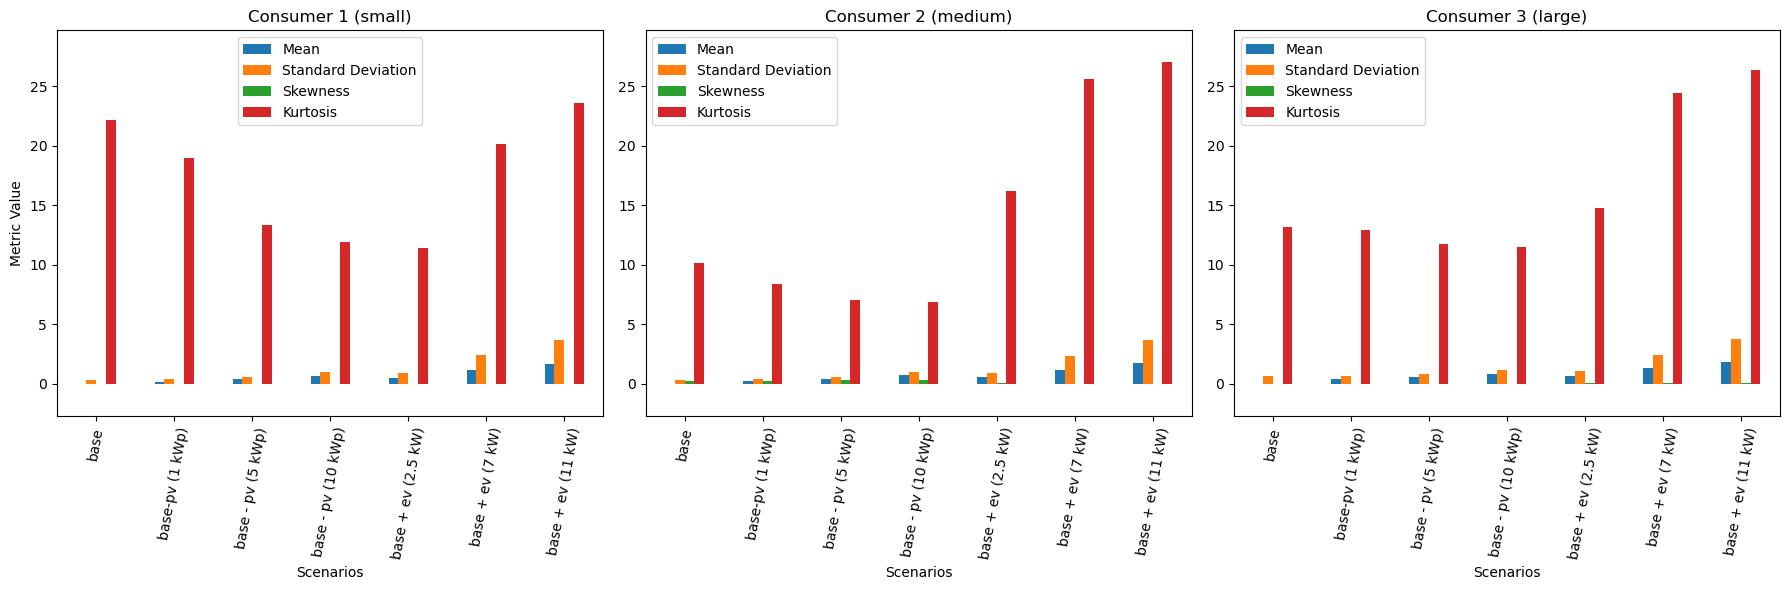

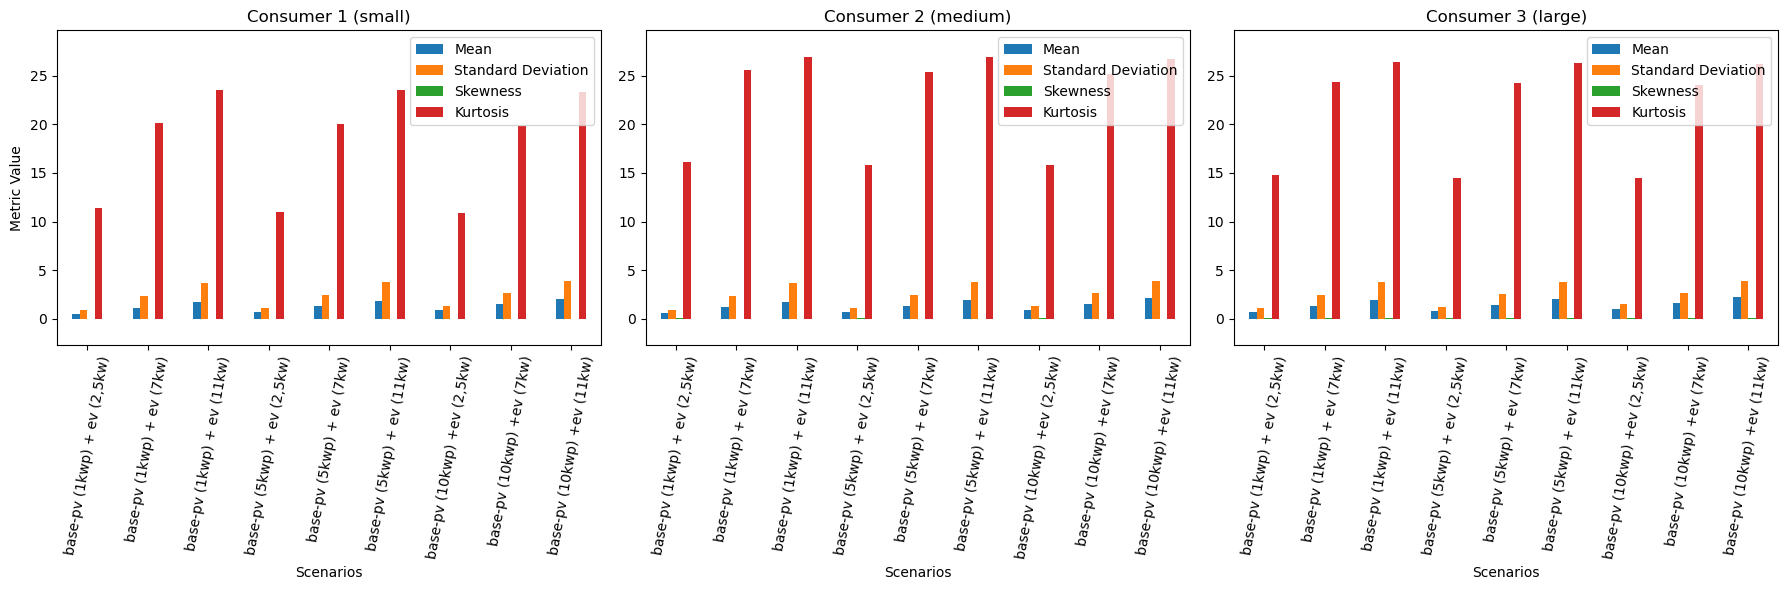

In [471]:
# Mean, std, skew, kurt
plot_multiple_bars(qhC1_diff, qhC2_diff, qhC3_diff, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(qhC1_combined_diff, qhC2_combined_diff, qhC3_combined_diff, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")

In [472]:
# Normalized to base
print(qhC1_diff["base"])

qhC1_diff_norm = qhC1_diff.div(qhC1_diff["base"], axis=0)

qhC2_diff_norm = qhC2_diff.div(qhC2_diff["base"], axis=0)
qhC3_diff_norm = qhC3_diff.div(qhC3_diff["base"], axis=0)
qhC1_combined_diff_norm = qhC1_combined_diff.div(qhC1_diff["base"], axis=0)
qhC2_combined_diff_norm = qhC2_combined_diff.div(qhC2_diff["base"], axis=0)
qhC3_combined_diff_norm = qhC3_combined_diff.div(qhC3_diff["base"], axis=0)

plot_multiple_bars(qhC1_diff_norm, qhC2_diff_norm, qhC3_diff_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")
plot_multiple_bars(qhC1_combined_diff_norm, qhC2_combined_diff_norm, qhC3_combined_diff_norm, "Consumer 1 (small)", "Consumer 2 (medium)", "Consumer 3 (large)", "Metric Value")


Mean                      0
Standard Deviation     0.35
Skewness               0.02
Kurtosis              22.18
Name: base, dtype: object


ZeroDivisionError: division by zero

In [ ]:
# Min, max
# Min per consumer per scenario
def plot_2_bars(df1, df2, title1, title2):
    # Create a figure with 1 row and 3 columns (for 3 subplots)
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot each DataFrame in a separate subplot
    df1.plot(kind="bar", ax=ax[0], legend=True)
    ax[0].set_title(title1)
    ax[0].set_ylabel("kW")
    ax[0].set_xlabel("Scenarios")
    ax[0].tick_params(axis='x', rotation=80)
    
    df2.plot(kind="bar", ax=ax[1], legend=True)
    ax[1].set_title(title2)
    ax[1].set_ylabel("kW")
    ax[1].set_xlabel("Scenarios")
    ax[1].tick_params(axis='x', rotation=80)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

minmax = results.iloc[[34, 35], 4:71]  
minmax.columns = range(len(minmax.columns))
minmax.index = ["Min", "Max"]

scenarios_seperate = ["base", "base-pv (1 kWp)", "base - pv (5 kWp)", "base - pv (10 kWp)", "base + ev (2.5 kW)", "base + ev (7 kW)", "base + ev (11 kW)"]
scenarios_combined = ["base-pv (1kwp) + ev (2,5kw)", "base-pv (1kwp) + ev (7kw)", "base-pv (1kwp) + ev (11kw)", "base-pv (5kwp) + ev (2,5kw)", "base-pv (5kwp) + ev (7kw)", "base-pv (5kwp) + ev (11kw)", "base-pv (10kwp) +ev (2,5kw)", "base-pv (10kwp) +ev (7kw)", "base-pv (10kwp) +ev (11kw)"]		

c1 = pd.DataFrame(minmax.iloc[:,[0, 10, 13, 16, 19, 22, 25]])
c1.columns = scenarios_seperate
c2 = pd.DataFrame(minmax.iloc[:,[1, 11, 14, 17, 20, 23, 26]])
c2.columns = scenarios_seperate
c3 = pd.DataFrame(minmax.iloc[:,[2, 12, 15, 18, 21, 24, 27]])
c3.columns = scenarios_seperate

min = pd.DataFrame({'C1': c1.iloc[0],'C2': c2.iloc[0],'C3': c3.iloc[0]})
max = pd.DataFrame({'C1': c1.iloc[1],'C2': c2.iloc[1],'C3': c3.iloc[1]})

plot_2_bars(min, max,"Minimum", "Maximum")

C1_combined = pd.DataFrame(minmax.iloc[:,[31, 34, 37, 43, 46, 49, 55, 58, 61]])
C1_combined.columns = scenarios_combined
C2_combined = pd.DataFrame(minmax.iloc[:,[32, 35, 38, 44, 47, 50, 56, 59, 62]])
C2_combined.columns = scenarios_combined
C3_combined = pd.DataFrame(minmax.iloc[:,[33, 36, 39, 45, 48, 51, 57, 60, 63]])
C3_combined.columns = scenarios_combined
min_combined = pd.DataFrame({'C1': C1_combined.iloc[0],'C2': C2_combined.iloc[0],'C3': C3_combined.iloc[0]})
max_combined = pd.DataFrame({'C1': C1_combined.iloc[1],'C2': C2_combined.iloc[1],'C3': C3_combined.iloc[1]})
#load_combined = pd.DataFrame({'C1': C1_combined.iloc[2],'C2': C2_combined.iloc[2],'C3': C3_combined.iloc[2]})

plot_2_bars(min_combined, max_combined, "Minimum", "Maximum")
